# Final Project
Name: Trần Việt Hoàng\
Student ID: 19127149

# About Dataset

**Author: Dgomonov**\
**License: CC0: Public Domain**

Airbnb is a lodging brokerage service, it is an online marketplace wherein hosts can put up their properties for rent with a focus on homestays and experiences. Since 2008, the company has provided millions of customers with the means to personalize their traveling experience while keeping a local touch.

This dataset details Airbnb's activity in the New York City marketplace in the year 2019. The dataset consists of 16 values:
* id: ID of the listing
* name: Name of the listing, could also be seen as a short description of the listing
* host_id: ID of the host
* host_name: Name of the host
* neighbourhood_group: The boroughs of New York City
* neighbourhood: The districts, avenues, neighbourhoods, etc. of NYC
* latitude: The latitude of the listing
* longitude: The longitude of the listing
* room_type: Type of lodging of the listing
* price: Price of the listing
* minimum_nights: minimum number of nights rentable
* number_of_reviews: self-explanatory
* last_review: The last date a review was left
* review_per_month: Average number of reviews per month
* calculated_host_listings_count: Number of listings the host has made
* availability_365: Number of days the listing is available within a 365-day period.

# Data Exploration
## **Preparations**
### Load libraries

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Load dataset

In [4]:
listing_df = pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
listing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Data Exploration
## **EDA**
### Dataset size

In [138]:
print('Listings data size:', listing_df.shape)

Listings data size: (48895, 16)


### Duplicated ?

In [6]:
print(listing_df.duplicated().any())

False


### Basic info


In [7]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

The dataset seems to have been thoroughly prepared beforehand and requires almost no additional cleaning, save for converting last_review to datetime.

### Cleaning

In [8]:
listing_df['last_review'] = pd.to_datetime(listing_df['last_review'])

## **Handling missing values**
First, let's take a look at the amount of null values for each column.

In [9]:
listing_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


At first glance, it can be observed that two particular columns make up the bulk of the amount of missing values: last_review and reviews_per_month. The missing values of in name and host_name are entirely insignificant as listings and hosts can be identified by id and host_id respectively, both of which contain no null values. Conversely, both last_review and reviews_per_month contain an appreciable amounts of missing values which warrants a closer look.

In [10]:
listing_df[listing_df['number_of_reviews']==0].head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365


The missing values of last_review and reviews_per_month seem to coincide with hosts who have 0 number of reviews. Let's check our assumption

In [11]:
listing_df[['last_review', 'reviews_per_month']].isnull().sum()

last_review          10052
reviews_per_month    10052
dtype: int64

In [12]:
print(listing_df[['last_review', 'reviews_per_month']].isnull().sum())
print(listing_df[listing_df['number_of_reviews']==0].groupby('number_of_reviews')['id'].count())

last_review          10052
reviews_per_month    10052
dtype: int64
number_of_reviews
0    10052
Name: id, dtype: int64


Assumption verified\
**Insight:** This fact may present a potential bifurcation of the dataset into two sets: reviewed and non-reviewed. We can also safely set all null values of reviews_per_month to 0.

In [14]:
listing_df.reviews_per_month.fillna(0,inplace=True)

In [45]:
rv_df = listing_df[listing_df['number_of_reviews']!=0]
norv_df = listing_df[listing_df['number_of_reviews']==0]

## **EDA (cont.)**

### Separate data types

In [36]:
id_cols = ['id', 'host_id', 'name', 'host_name']
cat_cols = ['neighbourhood', 'neighbourhood_group', 'room_type']
num_cols = ['latitude', 'longitude', 'price', 'minimum_nights',
           'number_of_reviews', 'reviews_per_month',
           'calculated_host_listings_count', 'availability_365']

### Numerical data analysis

In [37]:
listing_df[num_cols].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


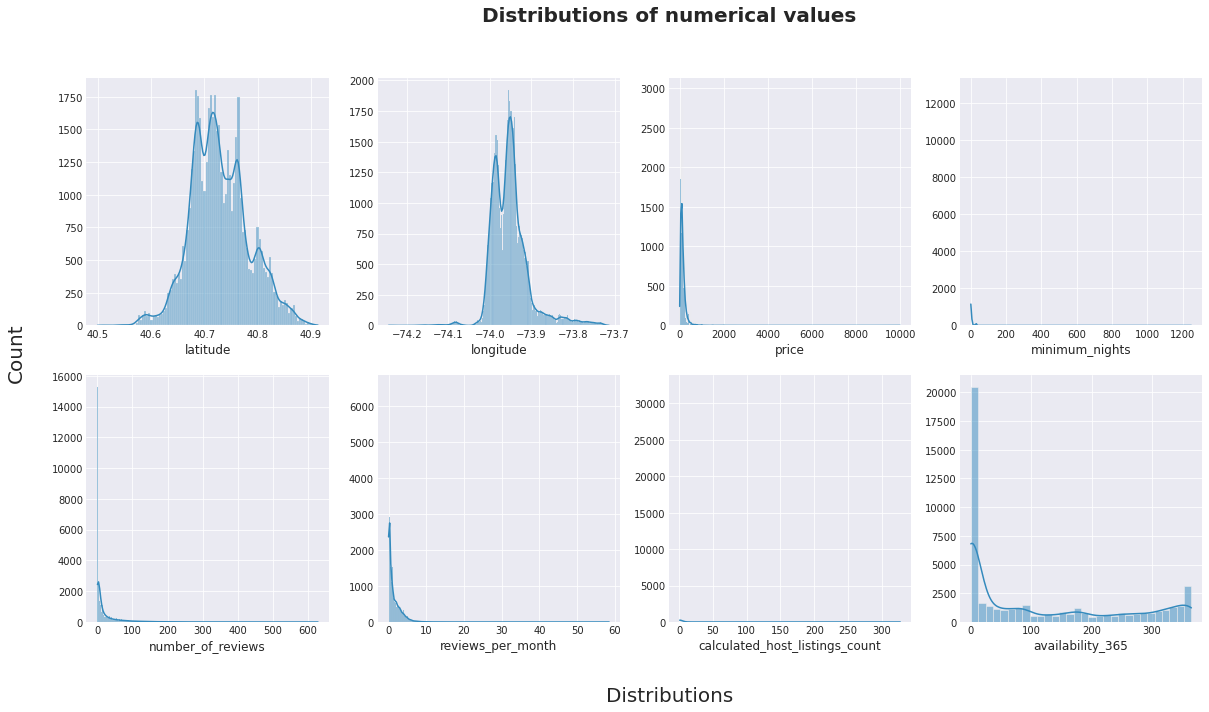

In [82]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
k = 0
for i in range(2):
    for j in range(4):
        sns.histplot(listing_df[num_cols[k]],ax=ax[i][j], kde=True, label=num_cols[k])
        ax[i][j].set(ylabel=None)
        k += 1
fig.suptitle('Distributions of numerical values', x = 0.53, weight='bold', fontsize = 20)
fig.supylabel('Count', x= 0.07, fontsize = 20)
fig.supxlabel('Distributions', x=0.53, fontsize = 20)
plt.show()

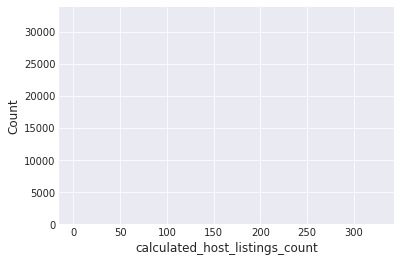

In [163]:
sns.histplot(listing_df['calculated_host_listings_count'])
plt.show()

**Insight:**
* Latitude and longitude both exhibit seemingly normal distribution. This means that the population is likely to concentrate in some places more than others.

Let's see how the numerical data correlate with one another

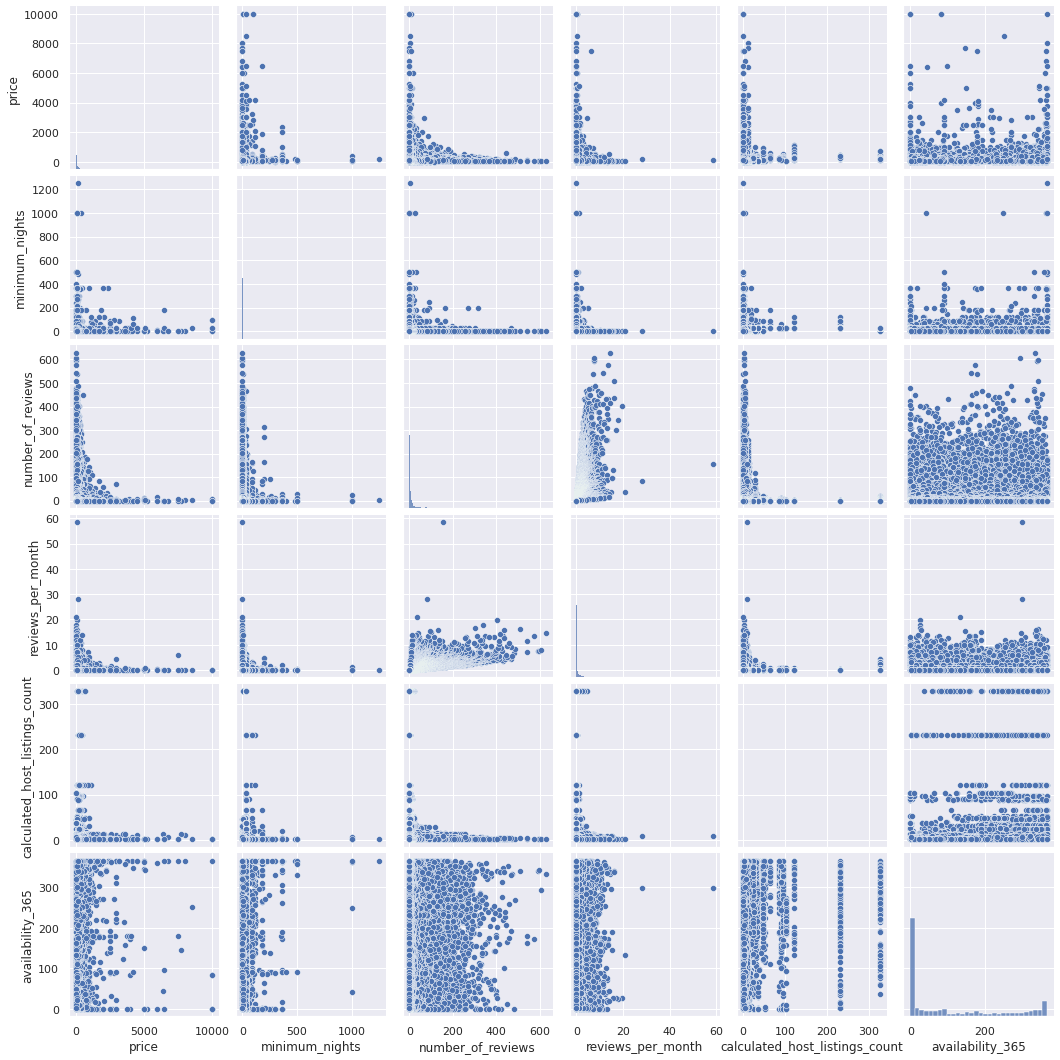

In [13]:
sns.set()
cols = ['price',
        'minimum_nights',
        'number_of_reviews',
        'reviews_per_month',
        'calculated_host_listings_count',
       'availability_365']
sns.pairplot(listing_df[cols], size = 2.5)
plt.show();

### Categorical data analysis

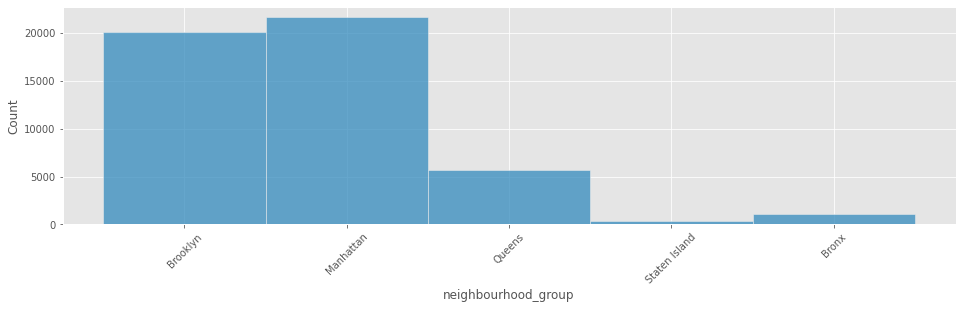

In [47]:
fig, ax = plt.subplots(figsize=(16,4))
sns.histplot(listing_df['neighbourhood_group'])
plt.xticks(rotation = 45)
plt.show()

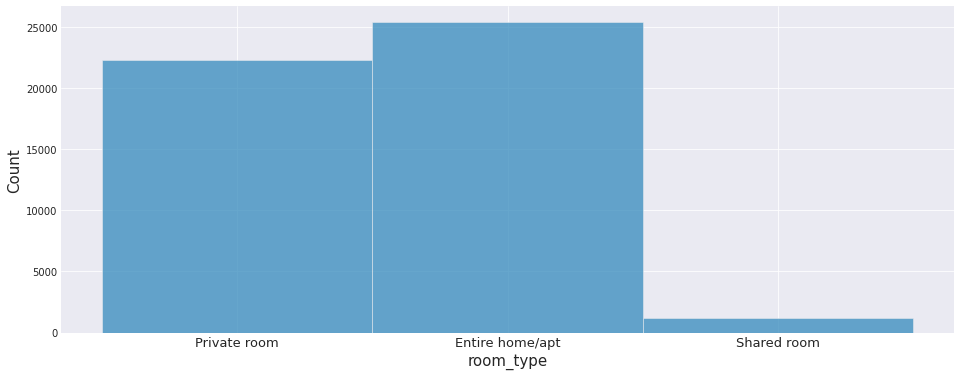

In [143]:
fig, ax = plt.subplots(figsize=(16,6))
sns.histplot(listing_df['room_type'])
ax.legend()
plt.xticks(fontsize = 13)
plt.xlabel('room_type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

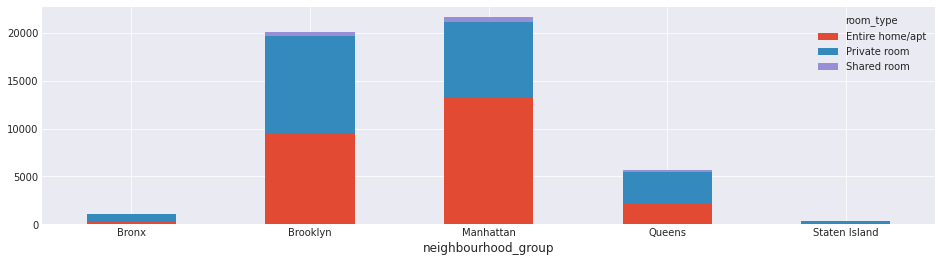

In [145]:
temp = pd.pivot_table(listing_df,
                     index = 'neighbourhood_group',
                     columns='room_type',
                     values='id',
                     aggfunc='count')
fig, ax = plt.subplots(figsize=(16,4))
temp.plot(kind='bar', stacked=True,ax=ax)
plt.xticks(rotation=0)
plt.show()

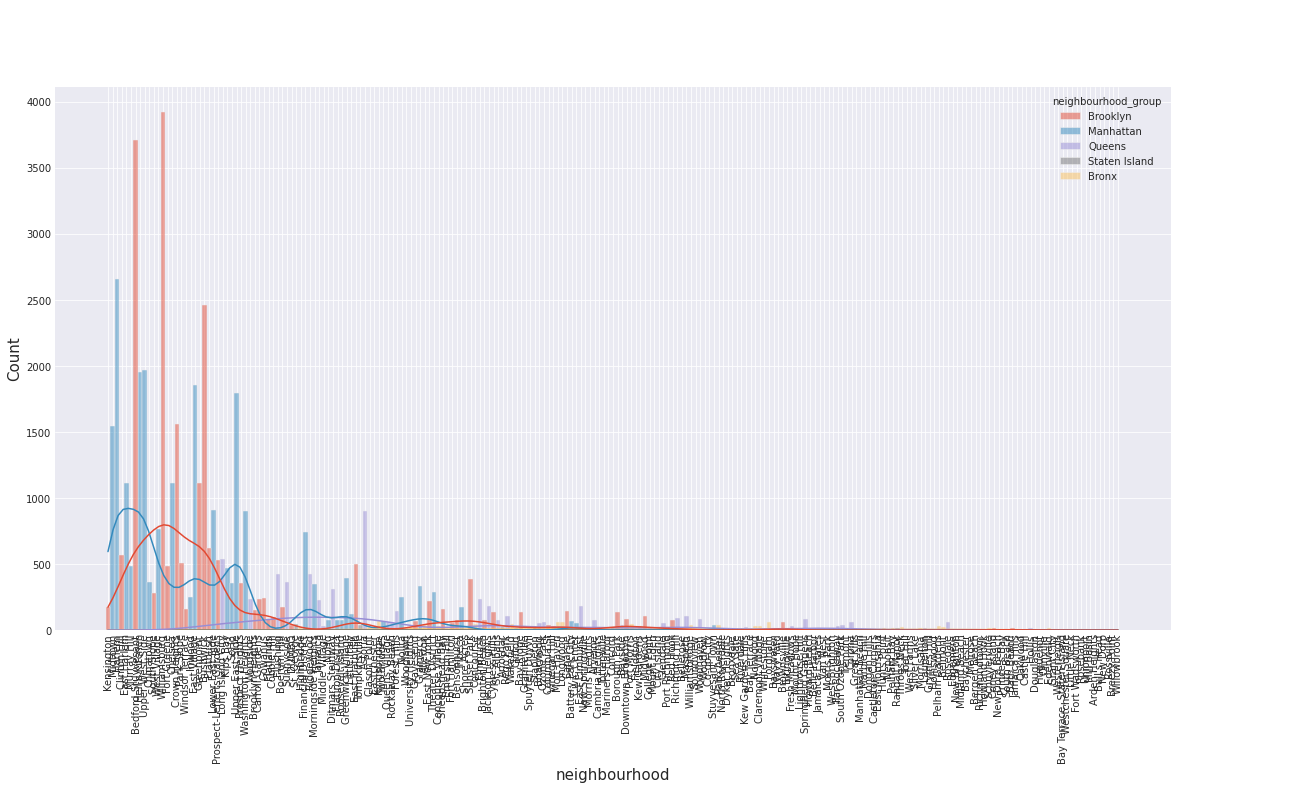

In [161]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(listing_df, x='neighbourhood', hue='neighbourhood_group',kde=True, cbar_kws={"rwidth":10, 'drawedges':True})
ax.get_legend()
fig.legend(fontsize=13)
plt.xticks(rotation = 90)
plt.xlabel('neighbourhood', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

### Description Analysis

Though it may not seem like it, the name column 

In [205]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('omw-1.4')
from collections import Counter
import re

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [209]:
_names = listing_df['name'].dropna().explode().values
_names = ' '.join(_names)
lemma = WordNetLemmatizer()

In [210]:
tokenized_text = word_tokenize(_names)
lemmed_text = [lemma.lemmatize(x).lower() for x in tokenized_text]

Filter out simple words (# of characters less than 3) and 

In [232]:
filter = [x for x in lemmed_text if re.search(r'.{3,}$', x)]
word_count = Counter(filter).most_common()
top_50 = word_count[0:50]

In [233]:
WC_df = pd.DataFrame(top_50, columns=['word', 'count'])
WC_df

,word,count
0,room,10125
1,bedroom,7721
2,private,7171
3,apartment,6669
4,cozy,5035
5,apt,4594
6,brooklyn,4118
7,studio,3977
8,the,3909
9,spacious,3745


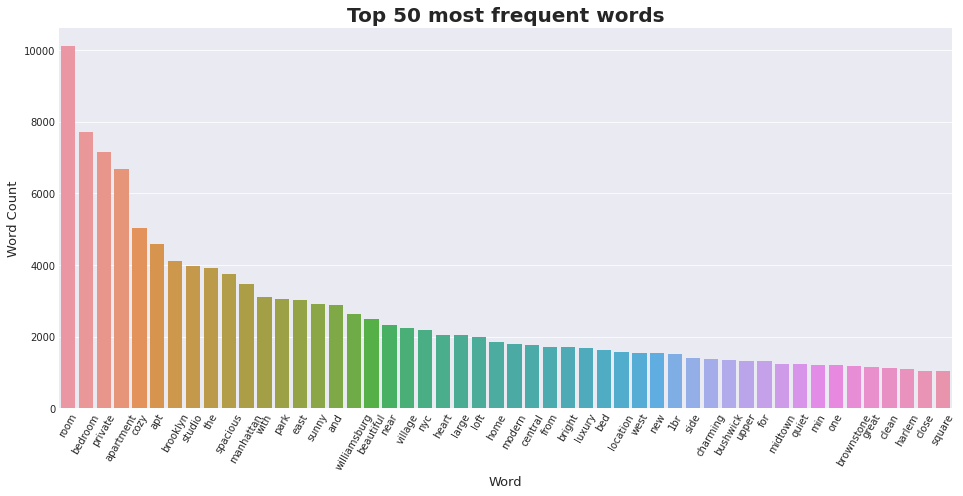

In [237]:
fig = plt.figure(figsize=(16,7))
sns.barplot(data=WC_df, x='word', y='count')
plt.xticks(rotation = 60)
plt.title('Top 50 most frequent words', weight = 'bold', fontsize=20)
plt.xlabel('Word', fontsize=13)
plt.ylabel('Word Count', fontsize=13)
plt.show()

## Price analysis
One critical point of concern for both hosts and guests is the pricing.

In [31]:
print('Max price: ', listing_df['price'].max())
print('Min price: ', listing_df['price'].min())

Max price:  10000
Min price:  0


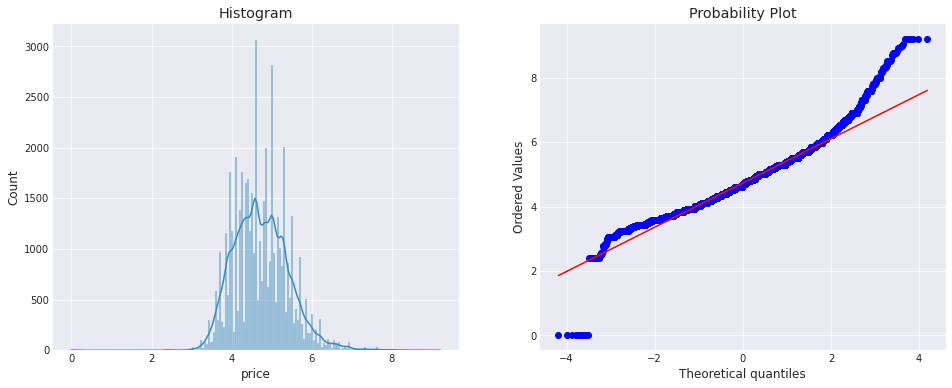

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(np.log1p(listing_df['price']), kde=True, ax=ax1)
ax1.set_title('Histogram')
stats.probplot(np.log1p(listing_df['price']),plot=ax2)
plt.show()

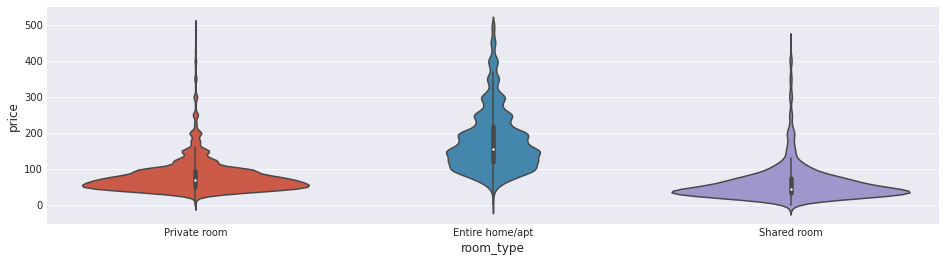

In [114]:
fig, ax = plt.subplots(figsize=(16, 4))
ax = sns.violinplot(data=listing_df[listing_df['price']<500], x='room_type', y='price')
plt.show()

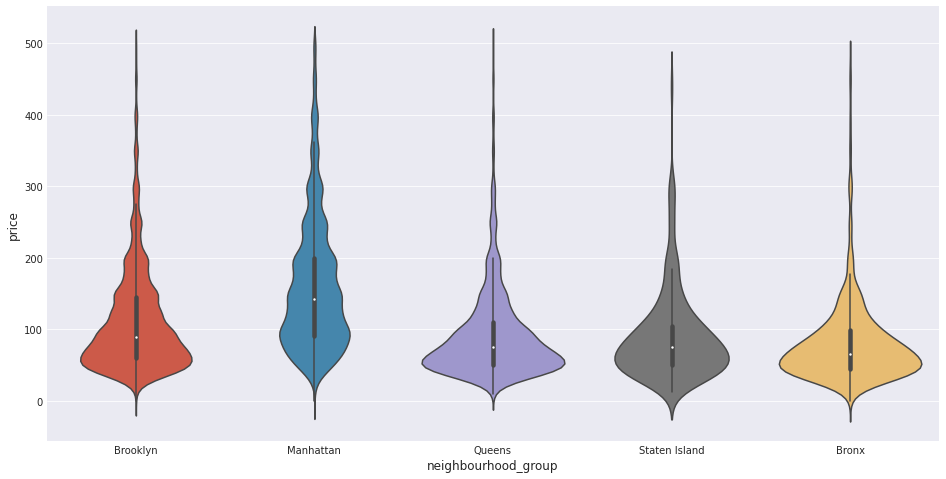

In [113]:
fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.violinplot(data=listing_df[listing_df['price']<500], x='neighbourhood_group', y='price')
# ax.set_yscale('log')
plt.show()

# Price prediction

In [127]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.metrics import mean_squared_error as MSE

## Preprocessing

In [124]:
model_df = listing_df.drop(['id', 'host_id', 'name', 'host_name', 'price', 'last_review', 'neighbourhood'], axis=1)
target = listing_df['price'].values

In [125]:
model_df.columns.values

array(['neighbourhood_group', 'latitude', 'longitude', 'room_type',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'], dtype=object)

In [135]:
tf = make_column_transformer((OneHotEncoder(), ['neighbourhood_group', 'room_type']), remainder='passthrough')
tfed = tf.fit_transform(model_df)
tf_df = pd.DataFrame(tfed, columns=tf.get_feature_names())

In [136]:
tf_df.head()

,onehotencoder__x0_Bronx,onehotencoder__x0_Brooklyn,onehotencoder__x0_Manhattan,onehotencoder__x0_Queens,onehotencoder__x0_Staten Island,onehotencoder__x1_Entire home/apt,onehotencoder__x1_Private room,onehotencoder__x1_Shared room,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,40.64749,-73.97237,1.0,9.0,0.21,6.0,365.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,40.75362,-73.98377,1.0,45.0,0.38,2.0,355.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,40.80902,-73.94190,3.0,0.0,NaN,1.0,365.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,40.68514,-73.95976,1.0,270.0,4.64,1.0,194.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,40.79851,-73.94399,10.0,9.0,0.10,1.0,0.0


In [118]:
X_train, X_test, y_train, y_test = train_test_split(model_df, pred_df)

ValueError: At least one array required as input

# Listing names analysis